# introduction:
## Travail sur le jeu de données MNIST
MNIST a été developpé par les précurseurs du deep learning, Y. LeCun et Y. Bengio, en 1998. Il
contient des données d’écriture manuelle des chi↵res de 0 ‘a 9. Il m‘ene généralement ‘a un probléme de
classification multi-classes ‘a 10 classes. Dans sa forme initiale, l’échantillon d’apprentissage comporte
60000 exemples, et 10000 en test.
Un exemple en entrée est une image de taille fixe 28*28, chaque pixel étant blanc (0) ou noir (1).
Le chifre est centré dans l’image.

Il est possible de le charger sous sklearn avec l’instruction mnist = fetch_openml('mnist_784')
du package datasets. Par la suite, les apprentissages se feront sur les 60000 premiers exemples, et
les tests se feront sur les exemples restants dans l’échantillon chargé. Il s’agit du protocole utilisé
par tous les chercheurs testant eurs algorithmes sur MNIST.

In [32]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mnist = fetch_openml('mnist_784')

In [4]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


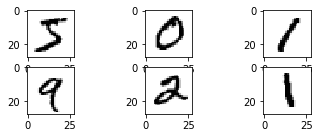

In [6]:
image= mnist.data.to_numpy()
plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

In [5]:
index_number= np.random.permutation(70000)
x1,y1=mnist.data.loc[index_number],mnist.target.loc[index_number]
x1.reset_index(drop=True,inplace=True)
y1.reset_index(drop=True,inplace=True)
x_train , x_test = x1[:60000], x1[60000:]
y_train , y_test = y1[:60000], y1[60000:]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Perceptron

In [26]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.0003],
         'n_iter_no_change': [5, 10, 15, 20, 50]}

percp = Perceptron(random_state=0)

clf = GridSearchCV(percp, params, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Perceptron(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0003],
                         'n_iter_no_change': [5, 10, 15, 20, 50]})

In [27]:
clf.best_params_

{'alpha': 0.0001, 'n_iter_no_change': 20}

In [28]:
clf= clf.best_estimator_

In [29]:
print(clf.score(x_test,y_test))

0.8857


In [30]:
from sklearn.metrics import accuracy_score 
y_pred = clf.predict(x_test) 
z=accuracy_score(y_test, y_pred) 
(1-z)*100

11.429999999999996

# MLPClassifier

In [37]:
from sklearn.neural_network import MLPClassifier
from time import time
i = 0
tab = pd.DataFrame(columns = ['alpha','hidden_layer','train_acc','test_acc','train_time'])
for a in [0.0001,0.001, 0.01]:
    for mi in [(500,300),(300)]:
        st = time()
        mlp = MLPClassifier(solver ='sgd',alpha=a, hidden_layer_sizes=mi, max_iter=100,learning_rate_init=0.07)
        mlp.fit(x_train,y_train)
        end = time() - st
        
        acc_tr = accuracy_score(y_train, mlp.predict(x_train)) 
        acc = accuracy_score(y_test, mlp.predict(x_test)) 
        tab.loc[i] = [a,mi,acc_tr,acc,end]
        i=i+1


In [38]:
tab

,alpha,hidden_layer,train_acc,test_acc,train_time
0,0.0001,"(500, 300)",1.0,0.9841,95.554298
1,0.0001,300.0,1.0,0.9838,87.298711
2,0.0010,"(500, 300)",1.0,0.9851,122.114454
3,0.0010,300.0,1.0,0.9834,104.550361
4,0.0100,"(500, 300)",1.0,0.9858,378.884524
5,0.0100,300.0,1.0,0.9854,159.176234


In [39]:
from sklearn.neural_network import MLPClassifier
clf= MLPClassifier(solver ='sgd',alpha= 0.01,hidden_layer_sizes=(500,300),learning_rate_init=0.07) 
clf.fit(x_train,y_train) 
print(clf.score(x_test,y_test))

0.985


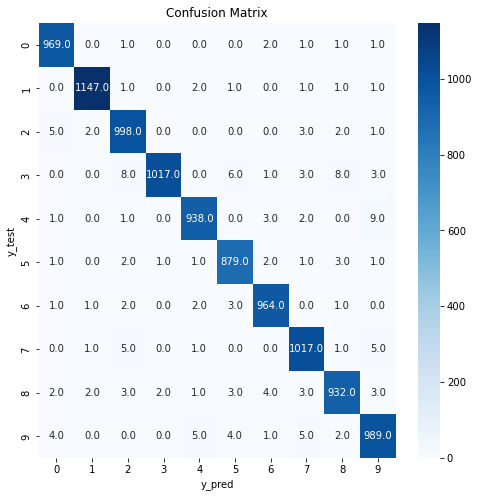

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)


cm = confusion_matrix(y_test,y_pred) 

f,ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm, annot = True, cmap = "Blues", linecolor = "gray", fmt = '.1f',ax = ax)

plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix")

plt.show()
